In [5]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
from smr import File
import numpy as np
from matplotlib import pyplot as plt


In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Pip/P21/P21_1 LBW5 RFW5 B.smr'

In [198]:
smr_content = File(f_name)
smr_content.read_channels()

Not implemented (type = 5)


In [201]:
# for chan in smr_content.channels:
#     print(chan)

# # print(smr_content.__dict__)
# print(vt.__dict__)

# dti = (vt.last_block - vt.first_block)/float(vt.data.size)
# idx = (int((vt.blocks[1]-vt.first_block)*dti))

chan_titles = [chan.title for chan in smr_content.channels]
for i, ct in enumerate(chan_titles):
    print("{}: {}".format(i, ct))

0: Unit
1: HEpos
2: VEpos
3: HTpos
4: VTpos
5: Keyboard


In [280]:
from kaveh.behavioral import oculomotor
t_range = (0,700) #s

i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])


tt = oculomotor.target(vt.data[prange], ht.data[prange], ht.dt, 'horizontal')
target_jumps_to = tt.get_target_jumps()



{-5000: array([3.36000e+02, 2.01000e+03, 3.06800e+03, 4.87600e+03, 6.75200e+03,
       7.71600e+03, 9.59500e+03, 1.05250e+04, 1.24530e+04, 1.34010e+04,
       1.52280e+04, 1.61590e+04, 1.71550e+04, 1.89840e+04, 2.08460e+04,
       2.17590e+04, 2.36360e+04, 2.46000e+04, 2.55980e+04, 2.65110e+04,
       2.83570e+04, 3.02340e+04, 3.21280e+04, 3.30930e+04, 3.40720e+04,
       3.49700e+04, 3.77280e+04, 3.86320e+04, 3.96220e+04, 4.05040e+04,
       4.23330e+04, 4.41280e+04, 4.50910e+04, 4.59880e+04, 4.87650e+04,
       4.96760e+04, 5.15220e+04, 5.24850e+04, 5.43480e+04, 5.52440e+04,
       5.71540e+04, 5.81010e+04, 5.99960e+04, 6.09090e+04, 6.19070e+04,
       6.27870e+04, 6.46100e+04, 6.65260e+04, 6.73410e+04, 6.82390e+04,
       6.90700e+04, 7.07990e+04, 7.24930e+04, 7.33410e+04, 7.41720e+04,
       7.58340e+04, 7.75440e+04, 7.92090e+04, 8.00720e+04, 8.17160e+04,
       8.25130e+04, 8.41420e+04, 8.49910e+04, 8.58200e+04, 8.66510e+04,
       8.94830e+04, 9.03260e+04, 9.19530e+04, 9.27830e+0

<IPython.core.display.Javascript object>


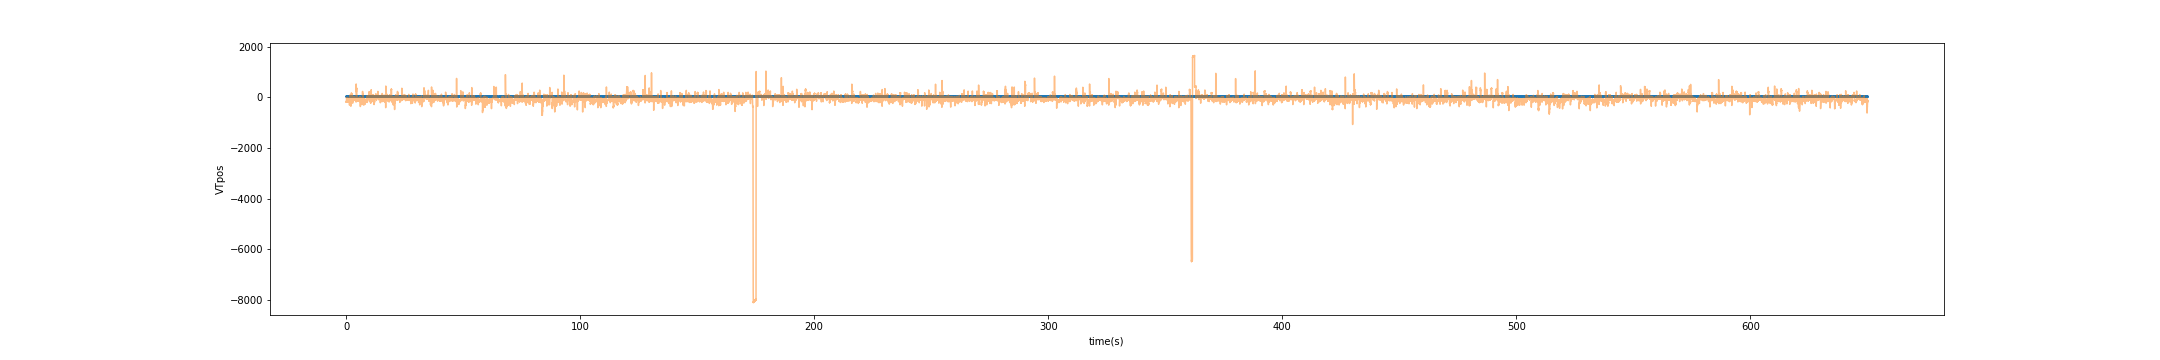

<IPython.core.display.Javascript object>


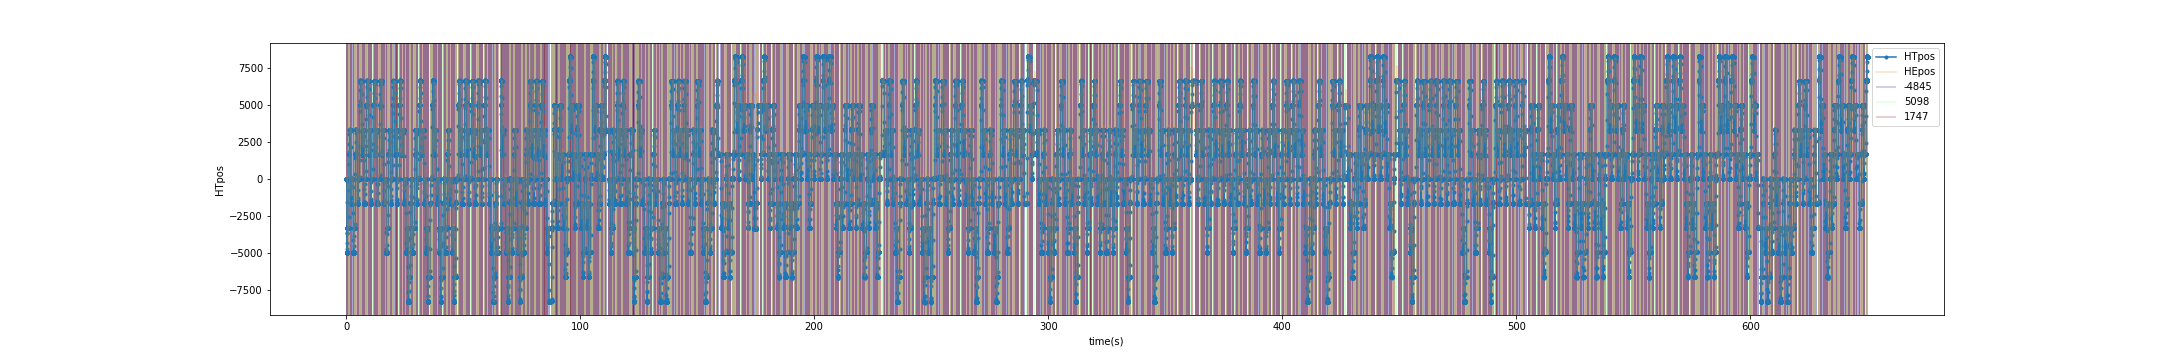

In [348]:
%matplotlib notebook
import scipy.signal

# import time
#time.sleep(5)  

#Params:
t_range = (0,700) #s
fsize = (30,5)


vt = smr_content.get_channel(4)
ve = smr_content.get_channel(2)

ht = smr_content.get_channel(3)
he = smr_content.get_channel(1)

i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange]/float(2*vt.divide))
# plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, ve.data[prange]/float(2*ve.divide), alpha=0.5)
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange])
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, ve.data[prange], alpha=0.5)
plt.ylabel(vt.title)
plt.xlabel('time(s)')

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange]/float(2*ht.divide),'.-')
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange]/float(2*ht.divide), alpha=0.25)

plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange],'.-')
plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange], alpha=0.25)

plt.ylabel(ht.title)
plt.xlabel('time(s)')


# find target jumps
ht_diff = np.abs(np.diff(ht.data[prange]))
target_jump_indices = scipy.signal.find_peaks(ht_diff, prominence=200)[0]

# remove detected target jumps that are sequential (less than 5 samples apart)
to_delete = []
for i, tji in enumerate(target_jump_indices[1:]):
    if tji - target_jump_indices[i] < 5:
        to_delete = to_delete + [i+1]
mask = np.ones(target_jump_indices.shape, dtype=bool)
mask[to_delete] = False
target_jump_indices = target_jump_indices[mask]

# plt.plot(peaks*ht.dt, ht.data[prange][peaks], '*r')

# plots.axvlines(plt.gca(), target_jump_indices*ht.dt, alpha = 0.25, color='red')
# plots.axvlines(plt.gca(), 66188*ht.dt, alpha = 0.75, color='g')
# plots.axvlines(plt.gca(), (tji+5)*ht.dt, alpha = 0.75, color='b')
# plots.axvlines(plt.gca(), (tji-5)*ht.dt, alpha = 0.75, color='b')

# plt.figure()
# for i in range(1000):
#     plt.plot(ht.data[prange],vt.data[prange], '.')
#     plt.xlabel(ht.title[i])
#     plt.ylabel(vt.title[i])
#     time.sleep(0.01)
#     plt.cla()

In [334]:
target_jumps_to = {}
for ja in jump_amps:
    target_jumps_to[ja] = np.array([])

for tji in target_jump_indices:
    jump_vec = ht.data[prange][tji + 5] - ht.data[prange][tji - 5]
    for ja in jump_amps:
        if jump_vec < ja + bin_size and jump_vec >= ja:
            target_jumps_to[ja] = np.concatenate((target_jumps_to[ja], [tji]))

from kaveh import plots
colors = plt.cm.jet(np.linspace(0,1,jump_amps.size))
for i, ja in enumerate(jump_amps):
    plots.axvlines(plt.gca(), target_jumps_to[ja]*ht.dt, alpha = 0.25, color=colors[i])        

legend_labels = [ht.title , he.title] + [str(ja + bin_size/2) for ja in jump_amps]
plt.legend(legend_labels)


TypeError: unhashable type: 'numpy.ndarray'

<IPython.core.display.Javascript object>


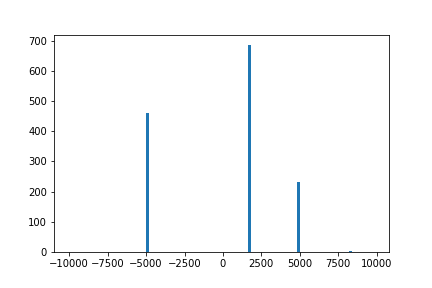

[-5000  1600  4800]


In [295]:
# histogram of target jumps

jump_vecs = []
for tji in target_jump_indices:
    jump_vecs = jump_vecs + [ht.data[prange][tji + 5] - ht.data[prange][tji - 5]]
#     if ht.data[prange][tji + 5] - ht.data[prange][tji - 5] < 8400 and ht.data[prange][tji + 5] - ht.data[prange][tji - 5] > 8200:
#         print(tji)
#         print(ht.data[prange][tji + 5])
#         print(ht.data[prange][tji - 5])


bin_size = 200
plt.figure()
plt.hist(jump_vecs, bins=np.arange(-10000, 10000, bin_size))
[hist, bin_edges] = np.histogram(jump_vecs, bins=np.arange(-10000, 10000, bin_size))
hist[hist < 20] = 0 # remove rare target jump vectors
jump_amps = bin_edges[np.nonzero(hist)]
print(jump_amps)

In [365]:
from sklearn.cluster import KMeans
jump_vecs = np.array(jump_vecs).reshape(-1,1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(jump_vecs)
jump_amps = kmeans.cluster_centers_
jump_amps = np.array([int(ja) for ja in jump_amps])

In [367]:
target_jumps_to = {}

for i, ja in enumerate(jump_amps):
    target_jumps_to[ja] = target_jump_indices[np.where(kmeans.labels_ == i)]

# from kaveh import plots
# colors = plt.cm.jet(np.linspace(0,1,jump_amps.size))
# for i, ja in enumerate(jump_amps):
#     plots.axvlines(plt.gca(), target_jumps_to[ja]*ht.dt, alpha = 0.25, color=colors[i])        

# legend_labels = [ht.title , he.title] + [str(ja + bin_size/2) for ja in jump_amps]
# plt.legend(legend_labels)

In [368]:
jump_amps

array([-4945,  4998,  1647])

<IPython.core.display.Javascript object>


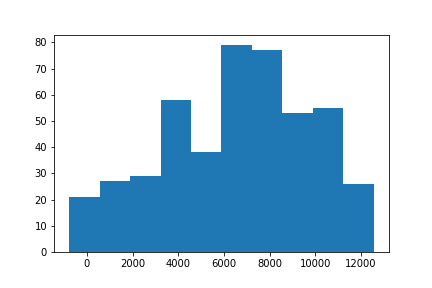

(array([21., 27., 29., 58., 38., 79., 77., 53., 55., 26.]),
 array([ -773.58531317,   559.21468683,  1892.01468683,  3224.81468683,
         4557.61468683,  5890.41468683,  7223.21468683,  8556.01468683,
         9888.81468683, 11221.61468683, 12554.41468683]),
 <a list of 10 Patch objects>)

In [370]:
plt.figure()
plt.hist(ht.data[prange][target_jumps_to[jump_amps[0]]] - kmeans.cluster_centers_[0])

<IPython.core.display.Javascript object>


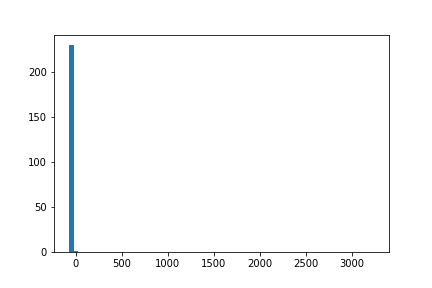

1.0268739325145626e-11


In [385]:
i = 1

distances = jump_vecs[kmeans.labels_ == i] - kmeans.cluster_centers_[i]

np.where(np.abs(distances) >  )

plt.figure()
plt.hist(distances, bins = np.arange(np.min(distances), np.max(distances), 50))

print(np.mean(distances))

In [346]:
    
target_jump_indices[np.where(kmeans.labels_ == 0)]

array([   336,   2010,   3068,   4876,   6752,   7716,   9595,  10525,
        12453,  13401,  15228,  16159,  17155,  18984,  20846,  21759,
        23636,  24600,  25598,  26511,  28357,  30234,  32128,  33093,
        34072,  34970,  37728,  38632,  39622,  40504,  42333,  44128,
        45091,  45988,  48765,  49676,  51522,  52485,  54348,  55244,
        57154,  58101,  59996,  60909,  61907,  62787,  64610,  66526,
        67341,  68239,  69070,  70799,  72493,  73341,  74172,  75834,
        77544,  79209,  80072,  81716,  82513,  84142,  84991,  85820,
        86651,  89483,  90326,  91953,  92783,  93581,  96039,  96904,
        97751,  99381, 100277, 101075, 102771, 103635, 106111, 106910,
       107789, 109419, 111064, 112292, 113090, 114669, 116347, 117162,
       118825, 119671, 120522, 122483, 122847, 125587, 126552, 127481,
       128396, 130258, 132150, 133148, 134079, 135906, 136803, 139614,
       140577, 142420, 143334, 145195, 146126, 147107, 148934, 150730,
      

In [237]:
a = [3]

b = np.array([1,2])

print(np.concatenate((a,b)))

[3 1 2]


In [222]:
primary_to_left = []
primary_to_right = []
corrective_to_right = []
for tji in target_jump_indices:
    jump_vec = ht.data[prange][tji + 5] - ht.data[prange][tji - 5]
    if jump_vec < jump_amps[0] + bin_size and jump_vec > jump_amps[0]:
        primary_to_left = primary_to_left + [tji]
    elif jump_vec < jump_amps[1] + bin_size and jump_vec > jump_amps[1]:
        corrective_to_right = corrective_to_right + [tji]
    elif jump_vec < jump_amps[2] + bin_size and jump_vec > jump_amps[2]:
        primary_to_right = primary_to_right + [tji]

primary_to_left = np.array(primary_to_left)  
primary_to_right = np.array(primary_to_right)
corrective_to_right = np.array(corrective_to_right)

plots.axvlines(plt.gca(), primary_to_right*ht.dt, alpha = 0.25, color='red')        
plots.axvlines(plt.gca(), primary_to_left*ht.dt, alpha = 0.25, color='g')     
plots.axvlines(plt.gca(), corrective_to_right*ht.dt, alpha = 0.25, color='m')     

<IPython.core.display.Javascript object>


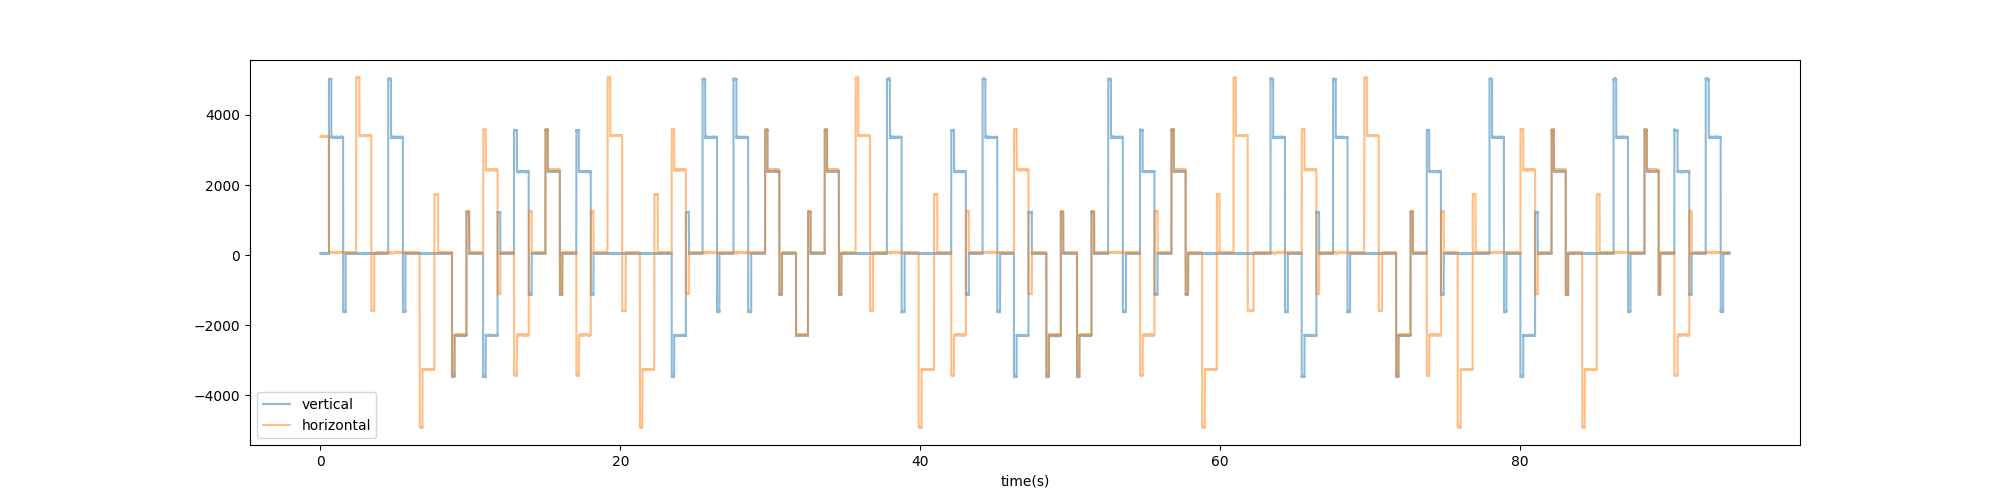

In [11]:
t_range = (6,100) #s
fsize = (20,5)


vt = smr_content.get_channel(4)

i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])

plt.figure(figsize = fsize)
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange], alpha=0.5)
plt.xlabel('time(s)')
ht = smr_content.get_channel(3)
plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange] , alpha=0.5)
plt.legend(['vertical', 'horizontal'])


KeyboardInterrupt: 

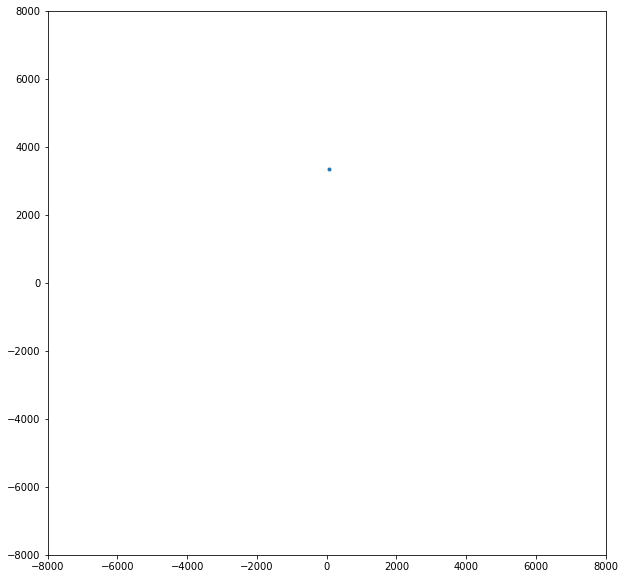

In [15]:
%matplotlib inline
import time
# import pylab as pl
from IPython import display
plt.figure(figsize=(10,10))

for i in range(i_range[0], i_range[1], 5):
    plt.plot(ht.data[i],vt.data[i], '.')
    plt.ylim((-8000,8000))
    plt.xlim((-8000,8000))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.005)
    plt.cla()
#     plt.cla()

In [ ]:
plt.figure(figsize=fsize)
ht_diff = np.abs(np.diff(ht.data[prange]))
plt.plot(np.arange(0, ht_diff.size)*ht.dt, ht_diff)
plt.ylabel("diff of {}".format(ht.title))
plt.xlabel('time(s)')

import scipy.signal

peaks = scipy.signal.find_peaks(ht_diff, prominence=100)[0]-1

plt.plot(peaks*ht.dt, ht_diff[peaks], '*r')
# plt.figure(figsize=fsize)
# plt.plot(scipy.signal.find_peaks(ht_diff)[1])

In [ ]:
# import csv
# import os

# def append_to_csv_string(csv_string, new_string):
#     if not csv_string:
#         return new_string
#     else:
#         return [csv_string] + [new_string]


# source_path = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/'

# with open('behavioral_index.csv', 'a') as f:
#     for root, dirnames, filenames in os.walk(source_path):
#         for filename in filenames:
#             if filename.endswith('smr'):
#                 f_name = os.path.join(root, filename)
#                 csv_row = [f_name];
                
#                 smr_content = File(f_name)
#                 smr_content.read_channels()
                
#                 chans = smr_content.channels
                
#                 for i, chan in enumerate(chans):
#                     if 'VT' in chan.title:
#                         csv_row = csv_row + ['VT'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['VT'] + ['NA']

#                     if 'HT' in chan.title:
#                         csv_row = csv_row + ['HT'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['HT'] + ['NA']

#                     if 'VE' in chan.title:
#                         csv_row = csv_row + ['VE'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['VE'] + ['NA']

#                     if 'HE' in chan.title:
#                         csv_row = csv_row + ['HE'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['HE'] + ['NA']

#                 print(csv_row)
#                 writer = csv.writer(f)
#                 writer.writerow(csv_row)

                        
                    
                    
            